In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/anaconda/envs/py35/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda/envs/py35/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


# Part 1 - Creating Unsupervised Model

# Import dataset

In [2]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
dataset.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [3]:
dataset.shape

(690, 16)

In [4]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Feature Scaling

In [5]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X = sc.fit_transform(X)

# Training SOM

In [6]:
from minisom import MiniSom

In [7]:
som = MiniSom(x = 10, y = 10, input_len=15, learning_rate=0.5, sigma = 1.0)

In [8]:
som.random_weights_init(X)

In [9]:
som.train_random(X, num_iteration=100)

# Visualizing Results

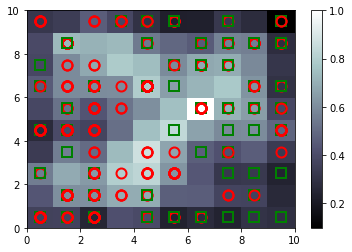

In [10]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o','s']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5, 
         w[1] + 0.5,
        markers[y[i]],
        markeredgecolor = colors[y[i]],
        markerfacecolor = 'None',
        markersize = 10,
        markeredgewidth = 2)
show()

# FInding the Frauds

In [11]:
mappings = som.win_map(X)

In [12]:
mappings

defaultdict(list,
            {(0,
              0): [array([0.38898166, 0.        , 0.23804511, 0.0625    , 0.        ,
                     0.23076923, 0.375     , 0.04385965, 0.        , 0.        ,
                     0.        , 1.        , 0.5       , 0.14      , 0.        ]), array([1.77504415e-01, 0.00000000e+00, 1.00300752e-01, 3.75000000e-01,
                     0.00000000e+00, 1.00000000e+00, 8.75000000e-01, 0.00000000e+00,
                     0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
                     5.00000000e-01, 7.70000000e-02, 3.20000000e-04]), array([0.00980263, 0.        , 0.08646617, 0.00589286, 0.5       ,
                     0.76923077, 0.375     , 0.00140351, 0.        , 0.        ,
                     0.        , 1.        , 0.5       , 0.19      , 0.        ]), array([2.93394039e-01, 0.00000000e+00, 6.47819549e-01, 1.51785714e-01,
                     0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.75438596e-01,
                

In [13]:
mappings.keys()

dict_keys([(7, 3), (1, 3), (5, 9), (5, 6), (9, 8), (8, 0), (7, 7), (2, 1), (2, 6), (1, 6), (9, 4), (4, 2), (2, 5), (8, 5), (7, 2), (4, 0), (9, 0), (4, 9), (2, 9), (2, 0), (8, 1), (4, 8), (3, 6), (6, 3), (1, 5), (5, 0), (0, 4), (8, 6), (3, 5), (4, 1), (1, 1), (5, 7), (5, 4), (0, 0), (3, 2), (8, 2), (7, 1), (7, 9), (2, 2), (6, 0), (1, 4), (7, 5), (2, 3), (0, 7), (6, 7), (1, 0), (9, 6), (6, 5), (4, 6), (2, 7), (9, 3), (7, 0), (6, 8), (9, 2), (5, 2), (5, 3), (3, 1), (9, 9), (0, 2), (7, 4), (0, 6), (1, 8), (8, 8), (4, 3), (1, 7), (0, 9), (9, 5), (3, 9), (7, 8), (2, 4), (8, 4)])

In [14]:
mappings[(6,5)]

[array([0.34498997, 0.        , 0.37593985, 0.05357143, 0.5       ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.5       , 0.038     , 0.        ]),
 array([0.97284657, 0.        , 0.48496241, 0.14285714, 0.5       ,
        0.30769231, 0.25      , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.5       , 0.05      , 0.0096    ]),
 array([0.6021247 , 0.        , 0.12781955, 0.04464286, 0.        ,
        0.        , 0.        , 0.11403509, 0.        , 0.        ,
        0.        , 0.        , 0.5       , 0.14      , 0.        ]),
 array([0.3433562 , 0.        , 0.83834586, 0.21428571, 0.5       ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ]),
 array([0.42815612, 0.        , 0.34586466, 0.16821429, 0.5       ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.5     

In [17]:
# frauds = np.concatenate((mappings[(4,1)], mappings[(7,4)]), axis = 0)
frauds = np.array(mappings[(6,5)])

In [19]:
frauds.shape

(12, 15)

In [20]:
frauds

array([[3.44989969e-01, 0.00000000e+00, 3.75939850e-01, 5.35714286e-02,
        5.00000000e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        5.00000000e-01, 3.80000000e-02, 0.00000000e+00],
       [9.72846566e-01, 0.00000000e+00, 4.84962406e-01, 1.42857143e-01,
        5.00000000e-01, 3.07692308e-01, 2.50000000e-01, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        5.00000000e-01, 5.00000000e-02, 9.60000000e-03],
       [6.02124703e-01, 0.00000000e+00, 1.27819549e-01, 4.46428571e-02,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.14035088e-01,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        5.00000000e-01, 1.40000000e-01, 0.00000000e+00],
       [3.43356198e-01, 0.00000000e+00, 8.38345865e-01, 2.14285714e-01,
        5.00000000e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+0

In [21]:
frauds = sc.inverse_transform(frauds)

In [22]:
frauds = frauds.astype(int)

In [23]:
frauds

array([[15651868,        0,       38,        1,        2,        1,
               1,        0,        0,        0,        0,        0,
               2,       76,        1],
       [15808662,        0,       46,        4,        2,        5,
               3,        0,        1,        0,        0,        0,
               2,      100,      961],
       [15716082,        0,       22,        1,        1,        1,
               1,        3,        0,        0,        0,        0,
               2,      280,        1],
       [15651460,        0,       69,        6,        2,        1,
               1,        0,        0,        0,        0,        0,
               1,        0,        1],
       [15672637,        0,       36,        4,        2,        1,
               1,        0,        0,        0,        0,        0,
               2,      160,        1],
       [15752344,        0,       21,        5,        1,        1,
               1,        0,        0,        0,        0,

# Part 2 - Going from Unsupervised to Supervised Deep Learning

In [24]:
customers = dataset.iloc[:, 1:].values

In [25]:
frauds[:,0]

array([15651868, 15808662, 15716082, 15651460, 15672637, 15752344,
       15736533, 15673907, 15779207, 15611409, 15636454, 15615296])

In [26]:
is_fraud = np.zeros(len(dataset))

In [27]:
is_fraud.shape

(690,)

In [28]:
is_fraud

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [29]:
for i in range(len(dataset)):
    if dataset.iloc[i, 0] in frauds:
        is_fraud[i] = 1

In [30]:
is_fraud

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

In [32]:
import keras
from keras.models import Sequential
from keras.layers import Dense

/anaconda/envs/py35/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda/envs/py35/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [33]:
# Initialize ANN
classifier = Sequential()

In [34]:
# Adding the imput layer and the first hidden layer
classifier.add(Dense(units = 2, activation = 'relu', kernel_initializer= 'uniform', input_dim = 15))

Instructions for updating:
Colocations handled automatically by placer.


In [35]:
# Adding the output layer
classifier.add(Dense(units = 1, activation = 'sigmoid', kernel_initializer= 'uniform'))

In [36]:
# Compile ANN
classifier.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ['accuracy'])

In [37]:
# Fitting the ANN to the training set
classifier.fit(customers, is_fraud, batch_size = 1, epochs = 5)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
690/690 [==============================] - 1s 1ms/step - loss: 0.4442 - acc: 0.9826
Epoch 2/5
690/690 [==============================] - 1s 846us/step - loss: 0.1231 - acc: 0.9826
Epoch 3/5
690/690 [==============================] - 1s 817us/step - loss: 0.0684 - acc: 0.9826
Epoch 4/5
690/690 [==============================] - 1s 815us/step - loss: 0.0539 - acc: 0.9826
Epoch 5/5
690/690 [==============================] - 1s 822us/step - loss: 0.0464 - acc: 0.9826


# Part 3 - Fraud Predictions

In [38]:
# Predicting the probabilities of frauds
y_pred = classifier.predict(customers)

In [39]:
y_pred.shape

(690, 1)

In [40]:
y_pred

array([[7.06356764e-03],
       [3.73928845e-02],
       [3.73817086e-02],
       [1.41303837e-02],
       [2.95966864e-03],
       [3.30597162e-03],
       [1.56771839e-02],
       [7.35333562e-03],
       [8.55383277e-03],
       [5.77095151e-03],
       [1.59800053e-04],
       [2.34365463e-04],
       [3.10271978e-04],
       [1.93208456e-04],
       [7.15067983e-03],
       [5.60992062e-02],
       [8.12679529e-04],
       [1.79688334e-02],
       [1.62599385e-02],
       [1.08736455e-02],
       [5.86917400e-02],
       [1.41453147e-02],
       [3.09731960e-02],
       [1.43670440e-02],
       [1.07153654e-02],
       [1.99943781e-04],
       [1.66337192e-02],
       [5.19907475e-03],
       [1.55127048e-02],
       [1.28942728e-03],
       [2.97307968e-04],
       [2.41780281e-03],
       [1.37683749e-03],
       [2.34603882e-04],
       [1.82145834e-03],
       [6.90838397e-02],
       [2.59807706e-03],
       [1.30349398e-03],
       [1.15579963e-02],
       [2.83306837e-03],


In [41]:
y_pred = np.round(y_pred, 2)

In [42]:
y_pred

array([[0.01],
       [0.04],
       [0.04],
       [0.01],
       [0.  ],
       [0.  ],
       [0.02],
       [0.01],
       [0.01],
       [0.01],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.01],
       [0.06],
       [0.  ],
       [0.02],
       [0.02],
       [0.01],
       [0.06],
       [0.01],
       [0.03],
       [0.01],
       [0.01],
       [0.  ],
       [0.02],
       [0.01],
       [0.02],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.07],
       [0.  ],
       [0.  ],
       [0.01],
       [0.  ],
       [0.  ],
       [0.01],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.05],
       [0.01],
       [0.01],
       [0.02],
       [0.01],
       [0.01],
       [0.02],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.04],
       [0.01],
       [0.  ],
       [0.01],
       [0.01],
       [0.01],
       [0.03],
       [0.01],
       [0.  ],
       [0.

In [43]:
y_pred = np.concatenate((dataset.iloc[:,0:1].values, y_pred), axis = 1)

In [44]:
y_pred.shape

(690, 2)

In [45]:
y_pred

array([[1.57761560e+07, 9.99999978e-03],
       [1.57395480e+07, 3.99999991e-02],
       [1.56628540e+07, 3.99999991e-02],
       ...,
       [1.56754500e+07, 3.99999991e-02],
       [1.57764940e+07, 0.00000000e+00],
       [1.55924120e+07, 0.00000000e+00]])

In [46]:
y_pred[y_pred[:,1].argsort()]

array([[1.57631940e+07, 0.00000000e+00],
       [1.58020710e+07, 0.00000000e+00],
       [1.57950790e+07, 0.00000000e+00],
       ...,
       [1.57365330e+07, 3.00000012e-01],
       [1.56364540e+07, 3.00000012e-01],
       [1.57901130e+07, 3.00000012e-01]])

In [47]:
dataset.iloc[:,-1].values

array([0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,

In [48]:
y_pred[:,1]

array([0.01      , 0.04      , 0.04      , 0.01      , 0.        ,
       0.        , 0.02      , 0.01      , 0.01      , 0.01      ,
       0.        , 0.        , 0.        , 0.        , 0.01      ,
       0.06      , 0.        , 0.02      , 0.02      , 0.01      ,
       0.06      , 0.01      , 0.03      , 0.01      , 0.01      ,
       0.        , 0.02      , 0.01      , 0.02      , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.07      , 0.        , 0.        , 0.01      , 0.        ,
       0.        , 0.01      , 0.        , 0.        , 0.        ,
       0.        , 0.05      , 0.01      , 0.01      , 0.02      ,
       0.01      , 0.01      , 0.02      , 0.        , 0.        ,
       0.        , 0.        , 0.04      , 0.01      , 0.        ,
       0.01      , 0.01      , 0.01      , 0.03      , 0.01      ,
       0.        , 0.01      , 0.        , 0.03      , 0.        ,
       0.04      , 0.01      , 0.01      , 0.        , 0.     